## Importing the required libraries

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import IPython
import warnings; warnings.simplefilter('ignore')

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
from keras import regularizers

In [3]:
import os

In [4]:
mylist= os.listdir('SSPNet-Speaker-Personality-Corpus/Audio_clips/')

In [5]:
type(mylist)

list

In [6]:
mylist

['cut_feb2302-human-4.wav',
 'cut_feb0303-human-15.wav',
 'cut_feb0103-guest-4-17.wav',
 'cut_feb0403-human-16.wav',
 'cut_feb0905-human-9.wav',
 'cut_feb1802-human-14.wav',
 'cut_feb1604-human-15.wav',
 'cut_feb1404-guest-5-20.wav',
 'cut_feb2403-human-22.wav',
 'cut_feb0904-guest-4-21.wav',
 'cut_feb2404-human-22.wav',
 'cut_feb2805-guest-1-14.wav',
 'cut_feb1603-guest-1-4.wav',
 'cut_feb1405-guest-1-6.wav',
 'cut_feb0204-human-11.wav',
 'cut_feb1405-guest-5-24.wav',
 'cut_feb1405-guest-2-10.wav',
 'cut_feb1605-guest-6-20.wav',
 'cut_feb1704-human-10.wav',
 'cut_feb2204-guest-0-2.wav',
 'cut_feb1803-human-12.wav',
 'cut_feb2505-human-20.wav',
 'cut_feb1504-guest-4-17.wav',
 'cut_feb0302-human-13.wav',
 'cut_feb0302-guest-2-7.wav',
 'cut_feb1703-human-10.wav',
 'cut_feb1505-guest-0-2.wav',
 'cut_feb0902-guest-6-22.wav',
 'cut_feb0403-human-9.wav',
 'cut_feb2804-guest-6-18.wav',
 'cut_feb0201-human-23.wav',
 'cut_feb1704-human-4.wav',
 'cut_feb0804-guest-1-4.wav',
 'cut_feb0303-human-1

In [7]:
print(mylist[80])

cut_feb0202-human-14.wav


In [8]:
print(mylist[10][6:-16])

b2


## Plotting the audio file's waveform and its spectrogram

In [9]:
data, sampling_rate = librosa.load('SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0202-human-14.wav')

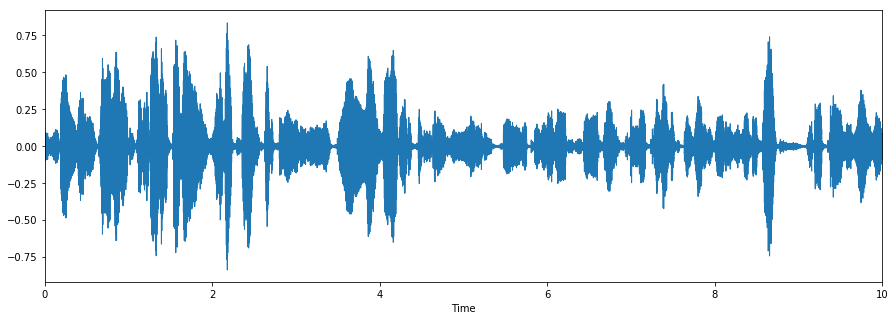

In [10]:
#% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [11]:
IPython.display.Audio('SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0202-human-14.wav')

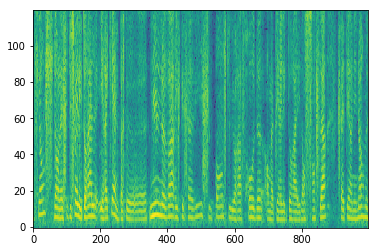

In [12]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0202-human-14.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [13]:
mylist

['cut_feb2302-human-4.wav',
 'cut_feb0303-human-15.wav',
 'cut_feb0103-guest-4-17.wav',
 'cut_feb0403-human-16.wav',
 'cut_feb0905-human-9.wav',
 'cut_feb1802-human-14.wav',
 'cut_feb1604-human-15.wav',
 'cut_feb1404-guest-5-20.wav',
 'cut_feb2403-human-22.wav',
 'cut_feb0904-guest-4-21.wav',
 'cut_feb2404-human-22.wav',
 'cut_feb2805-guest-1-14.wav',
 'cut_feb1603-guest-1-4.wav',
 'cut_feb1405-guest-1-6.wav',
 'cut_feb0204-human-11.wav',
 'cut_feb1405-guest-5-24.wav',
 'cut_feb1405-guest-2-10.wav',
 'cut_feb1605-guest-6-20.wav',
 'cut_feb1704-human-10.wav',
 'cut_feb2204-guest-0-2.wav',
 'cut_feb1803-human-12.wav',
 'cut_feb2505-human-20.wav',
 'cut_feb1504-guest-4-17.wav',
 'cut_feb0302-human-13.wav',
 'cut_feb0302-guest-2-7.wav',
 'cut_feb1703-human-10.wav',
 'cut_feb1505-guest-0-2.wav',
 'cut_feb0902-guest-6-22.wav',
 'cut_feb0403-human-9.wav',
 'cut_feb2804-guest-6-18.wav',
 'cut_feb0201-human-23.wav',
 'cut_feb1704-human-4.wav',
 'cut_feb0804-guest-1-4.wav',
 'cut_feb0303-human-1

In [14]:
print(mylist[0])
print(mylist[0][6:-16])

cut_feb2302-human-4.wav
b


## Setting the labels

In [15]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_Agreeableness')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_Agreeableness')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_Extraversion')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_Extraversion')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_Conscientiousness')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_Conscientiousness')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_Neuroticism')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_Neuroticism')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_Openness')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_Openness')

In [16]:
labels = pd.DataFrame(feeling_list)

## Getting the features of audio files using librosa

Automatically created module for IPython interactive environment
Learning the dictionary... 
Partial fit of  100 out of 2400
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 16 cluster centers.
Partial fit of  300 out of 2400
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Partial fit of 2200 out of 2400
Partial fit of 2300 out of 2400
Partial fit of 2400 out of 2400
done in 4.35s.


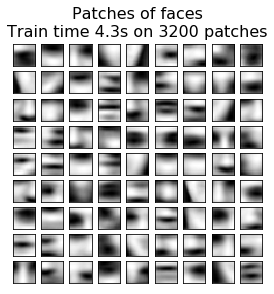

In [17]:
print(__doc__)

import time

import matplotlib.pyplot as plt
import numpy as np


from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

# #############################################################################
# Learn the dictionary of images

print('Learning the dictionary... ')
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size = (20, 20)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50,
                                  random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print('Partial fit of %4i out of %i'
                  % (index, 6 * len(faces.images)))

dt = time.time() - t0
print('done in %.2fs.' % dt)

# #############################################################################
# Plot the results
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())


plt.suptitle('Patches of faces\nTrain time %.1fs on %d patches' %
             (dt, 8 * len(faces.images)), fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [18]:
def parser(file_name_x):
    file_name = file_name_x
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=16000,mono=True) 
        pre_emphasis = 2
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    return mfccs,tonnetz

In [19]:
def feature():
    path = 'SSPNet-Speaker-Personality-Corpus/Audio_clips'
    files = [f for f in glob.glob(path + "**/*.wav", recursive=True)]
    features=np.empty((0,70))
    label=np.empty((0,1))
    print("Extraversion")
    for f in files[0:20]:
        mfccs,tonnetz=parser(f)
        print(mfccs.shape,tonnetz.shape)
        ext_features = np.hstack([mfccs,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,1))
    print("Agreeableness")    
    for f in files[120:140]:
        mfccs,tonnetz=parser(f)
        print(mfccs.shape,tonnetz.shape)
        ext_features = np.hstack([mfccs,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,2))
        
    print("Conscientiousness")
    for f in files[220:240]:
        mfccs,tonnetz=parser(f)
        print(mfccs.shape,tonnetz.shape)
        ext_features = np.hstack([mfccs,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,3))
    print("Neuroticism")    
    for f in files[340:360]:
        mfccs,tonnetz=parser(f)
        print(mfccs.shape,tonnetz.shape)
        ext_features = np.hstack([mfccs,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,4))
    print("Openness")    
    for f in files[400:420]:
        mfccs,tonnetz=parser(f)
        print(mfccs.shape,tonnetz.shape)
        ext_features = np.hstack([mfccs,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,5))    
        
        
    return features,label

## Getting the features of audio files using librosa

In [20]:
f,l=feature()

Extraversion
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
Agreeableness
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
Conscientiousness
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
Neuroticism
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
Openness
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)
(64,) (6,)

In [21]:
np.save('feature_audio_new.npy', f)

np.save('label_audio_new.npy', l)

f = np.load('feature_audio_1.npy')
l = np.load('label_audio_1.npy')

In [22]:
f[:2]

array([[-2.73165725e+02,  1.68506560e+02, -8.26776758e+01,
         4.52161458e+01, -2.73800063e+00, -3.63990036e+01,
         1.10157531e+01, -3.05618961e+01, -5.86670067e+00,
         7.98776183e-01, -2.81447085e+01,  4.03014018e+00,
        -6.74525415e+00, -1.06286906e+01,  9.26697797e+00,
        -1.07126985e+01, -3.15052212e+00,  1.89655348e+00,
        -1.16933006e+01, -2.82994914e+00, -6.99870917e+00,
        -7.99619714e+00, -2.42582561e+00, -7.73633228e+00,
        -1.94866823e+00, -3.35481630e+00, -5.29155970e+00,
         2.76590459e+00, -1.08361880e+00, -6.28858914e-01,
         2.91566266e+00,  3.24228242e-01,  2.36977995e+00,
         1.91938894e+00,  3.03247735e+00,  5.64422385e+00,
         3.73470124e+00,  5.34778301e+00,  4.57695733e+00,
         2.15218095e+00,  3.12273184e+00,  1.63097593e+00,
         7.51506296e-01, -1.70366015e-01, -1.04416384e+00,
         7.00913845e-01, -1.65450435e-01, -1.19973529e+00,
        -9.09971657e-01, -9.61602811e-01, -9.52792044e-0

In [23]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



clf = SVC(kernel='rbf',C=5,gamma=0.01, degree=3,probability=True)
clf.fit(f, l.ravel())

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## DEMO

In [42]:
file_name='SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0805-human-2.wav'
data, sampling_rate = librosa.load(file_name)

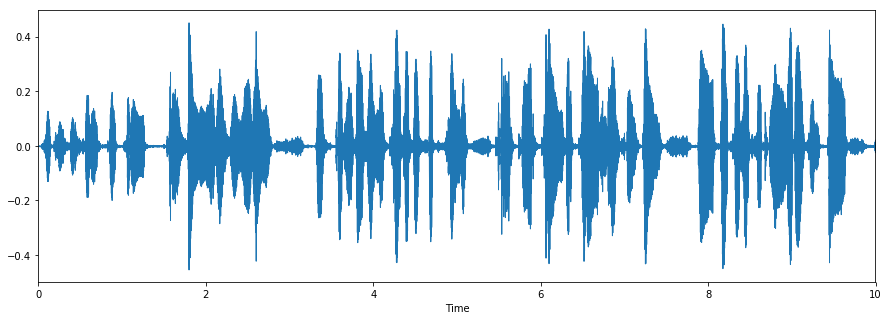

In [43]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [44]:
IPython.display.Audio(file_name)

In [45]:
mfccs,tonnetz=parser(file_name)
print(mfccs.shape,tonnetz.shape)
demo_features=np.empty((0,70))
demo_ext_features = np.hstack([mfccs,tonnetz])
demo_features = np.vstack([demo_features,demo_ext_features])

(64,) (6,)


In [46]:
clf.predict_proba(demo_features)

array([[0.20227236, 0.19950592, 0.19885065, 0.19629039, 0.20308068]])

In [47]:
clf.predict(demo_features)

array([4.])

# Below is the prediction number relation

# 1 : Extraversion
# 2 : Agreeableness
# 3 : Conscientiousness
# 4 : Neuroticism
# 5 : Openness